In [6]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


## import modules

In [22]:
# pip install sounddevice
# sudo apt-get install libportaudio2
# !pip install librosa

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sounddevice as sd
import librosa

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)

numpy version: 1.21.6
pandas version: 1.3.5


## load data

In [10]:
mel_path = '/content/play_sample.npy'

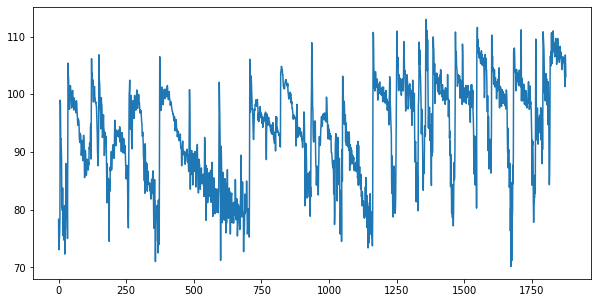

In [12]:
# data load
mel0 = np.load(mel_path)

# 0번째 hz의 db값 변화
db = mel0[0, :]
plt.figure(figsize=(10, 5))
plt.plot(db)
plt.show()

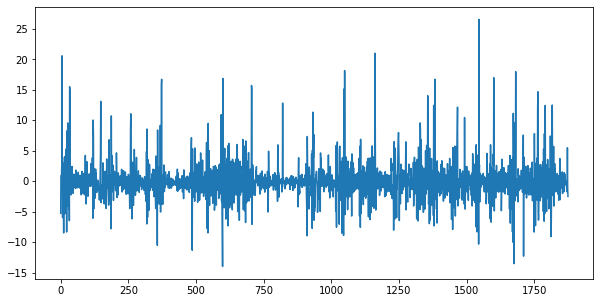

In [13]:
# 음악파일에서 사용하는 주파수 형태로 변환
t = []
for a in range(0, 1875):
    a1 = mel0[0, a]
    a2 = mel0[0, a+1]
    a3 = a2-a1
    t.append(a3)

plt.figure(figsize=(10,5))
plt.plot(t)
plt.show()

## 데이터 변환 후

In [14]:
mel0_2 = mel0+100

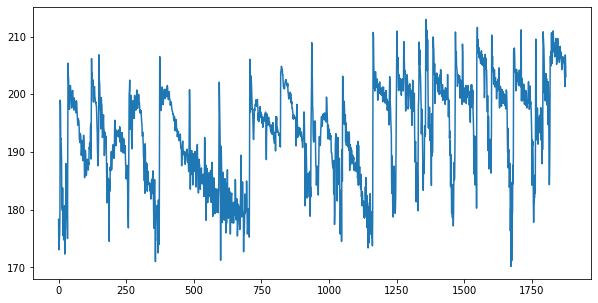

In [15]:
# 변환 파일의 db값 변화
db2 = mel0_2[0, :]
plt.figure(figsize=(10, 5))
plt.plot(db2)
plt.show()

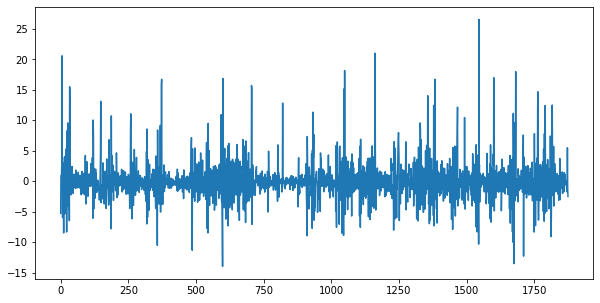

In [16]:
# 사람이 보기 편한 파형으로 변환
t2 = []
for b in range(0, 1875):
    b1 = mel0_2[0, b]
    b2 = mel0_2[0, b+1]
    b3 = b2-b1
    t2.append(b3)

plt.figure(figsize=(10,5))
plt.plot(t2)
plt.show()

## 데이터 재생

In [17]:
from time import sleep
def play_mel_numpy(num_mel_db_scale_path, sr = 16000):
    num_mel_db_scale = np.load(num_mel_db_scale_path)
    num_mel_ampli_scale = librosa.db_to_amplitude(num_mel_db_scale)
    hop_length = int(0.0125 * sr)
    win_length = int(0.05 * sr)
    hi = []
    for i in range((len(num_mel_ampli_scale[0])//500)+1):
        hi.append(librosa.feature.inverse.mel_to_audio(num_mel_ampli_scale[:,i*500:i*500+500],sr=sr,n_fft=2205, hop_length=hop_length, win_length=win_length))

    for sound in hi:
        sd.play(sound, sr)        
        sleep(len(sound)//sr+0.1)

In [ ]:
# 해당 코드는 colab으로 작동 X
# 로컬에서 사용하는 것을 권장
play_path = '/content/play_sample.npy'
play_mel_numpy(play_path)
